# 1. Bibliotecas

In [62]:
import pandas as pd
from sklearn import datasets

#2. Carregando Dados


In [63]:
dts_iris = datasets.load_iris()

In [64]:
pd.DataFrame(dts_iris['data'])

0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]

In [65]:
dts_iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [66]:
dts_iris['data'][0:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [67]:
dts_iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 3. KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier()

In [70]:
knn.fit(dts_iris['data'], dts_iris['target'])

KNeighborsClassifier()

In [71]:
dts_iris['data'].shape

(150, 4)

# 4. Avaliação (Holdout)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(dts_iris['data'], dts_iris['target'], test_size=0.3, random_state=12)

In [74]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [75]:
y_pred=knn.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(y_test, y_pred)

0.9777777777777777

In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
mc = confusion_matrix(y_test, y_pred)

In [80]:
from matplotlib import pyplot as plt

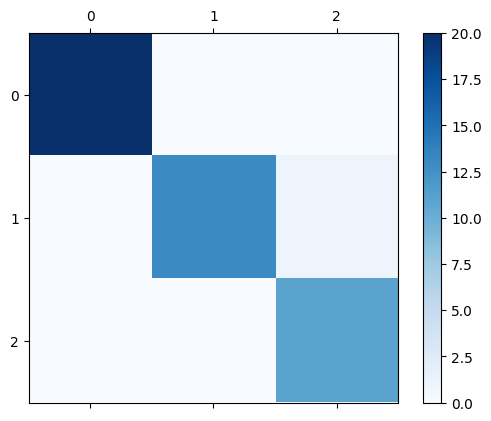

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(mc, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.show()

# 5. Normalizando

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
scaler = MinMaxScaler()
X = dts_iris['data']
X1 = scaler.fit_transform(X)

In [84]:
pd.DataFrame(X1).describe()

0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     0.428704    0.440556    0.467458    0.458056
std      0.230018    0.181611    0.299203    0.317599
min      0.000000    0.000000    0.000000    0.000000
25%      0.222222    0.333333    0.101695    0.083333
50%      0.416667    0.416667    0.567797    0.500000
75%      0.583333    0.541667    0.694915    0.708333
max      1.000000    1.000000    1.000000    1.000000

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X1, dts_iris['target'], test_size=0.3, random_state=12)

In [86]:
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

# Problema 2

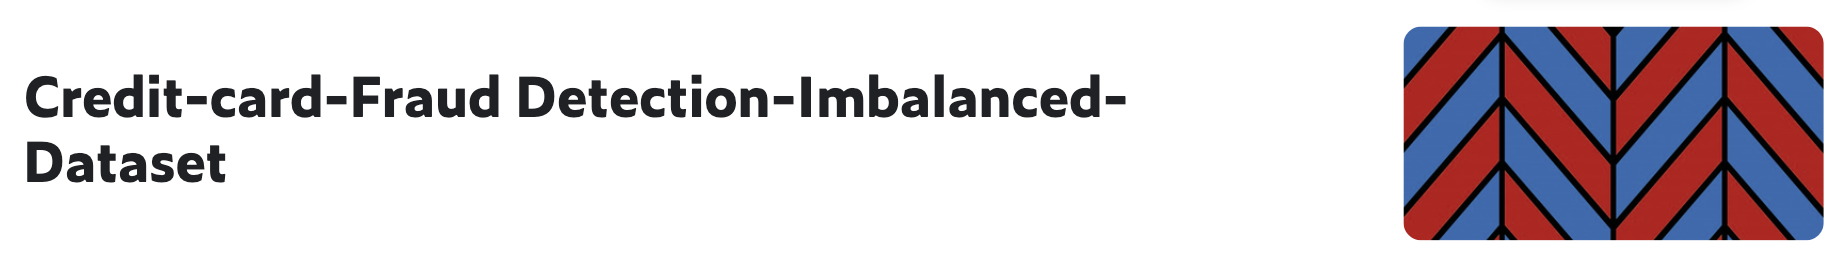

In [87]:
from google.colab import drive
drive.mount('/content/drive')
df_train = pd.read_csv('/content/drive/MyDrive/cdmu/credit_dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
df_train.columns

Index(['Unnamed: 0', 'ID', 'GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME',
       'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE',
       'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE',
       'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'TARGET'],
      dtype='object')

In [89]:
df_train.head()

Unnamed: 0       ID GENDER CAR REALITY  NO_OF_CHILD    INCOME  \
0           0  5008806      M   Y       Y            0  112500.0   
1           1  5008808      F   N       Y            0  270000.0   
2           2  5008809      F   N       Y            0  270000.0   
3           3  5008810      F   N       Y            0  270000.0   
4           4  5008811      F   N       Y            0  270000.0   

            INCOME_TYPE                 EDUCATION_TYPE           FAMILY_TYPE  \
0               Working  Secondary / secondary special               Married   
1  Commercial associate  Secondary / secondary special  Single / not married   
2  Commercial associate  Secondary / secondary special  Single / not married   
3  Commercial associate  Secondary / secondary special  Single / not married   
4  Commercial associate  Secondary / secondary special  Single / not married   

          HOUSE_TYPE  FLAG_MOBIL  WORK_PHONE  PHONE  E_MAIL  FAMILY SIZE  \
0  House / apartment           1           0      0       0          2.0   
1  House / apartment           1           0      1       1          1.0   
2  House / apartment           1           0      1       1          1.0   
3  House / apartment           1           0      1       1          1.0   
4  House / apartment           1           0      1       1          1.0   

   BEGIN_MONTH  AGE  YEARS_EMPLOYED  TARGET  
0           29   59               3       0  
1            4   52               8       0  
2           26   52               8       0  
3           26   52               8       0  
4           38   52               8       0

In [90]:
df_train['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [91]:
df_train['CAR'].unique()

array(['Y', 'N'], dtype=object)

In [92]:
df_train['REALITY'].unique()

array(['Y', 'N'], dtype=object)

In [93]:
df_train['INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'State servant', 'Student',
       'Pensioner'], dtype=object)

## Preparacao dos dados

In [94]:
df_train['GENDER'] = [0 if x=='M' else 1 for x in df_train['GENDER']]
df_train['CAR'] = [0 if x=='Y' else 1 for x in df_train['CAR']]
df_train['REALITY'] = [0 if x=='Y' else 1 for x in df_train['REALITY']]

In [95]:
df_train.head()

Unnamed: 0       ID  GENDER  CAR  REALITY  NO_OF_CHILD    INCOME  \
0           0  5008806       0    0        0            0  112500.0   
1           1  5008808       1    1        0            0  270000.0   
2           2  5008809       1    1        0            0  270000.0   
3           3  5008810       1    1        0            0  270000.0   
4           4  5008811       1    1        0            0  270000.0   

            INCOME_TYPE                 EDUCATION_TYPE           FAMILY_TYPE  \
0               Working  Secondary / secondary special               Married   
1  Commercial associate  Secondary / secondary special  Single / not married   
2  Commercial associate  Secondary / secondary special  Single / not married   
3  Commercial associate  Secondary / secondary special  Single / not married   
4  Commercial associate  Secondary / secondary special  Single / not married   

          HOUSE_TYPE  FLAG_MOBIL  WORK_PHONE  PHONE  E_MAIL  FAMILY SIZE  \
0  House / apartment           1           0      0       0          2.0   
1  House / apartment           1           0      1       1          1.0   
2  House / apartment           1           0      1       1          1.0   
3  House / apartment           1           0      1       1          1.0   
4  House / apartment           1           0      1       1          1.0   

   BEGIN_MONTH  AGE  YEARS_EMPLOYED  TARGET  
0           29   59               3       0  
1            4   52               8       0  
2           26   52               8       0  
3           26   52               8       0  
4           38   52               8       0

In [96]:
dummy_income_type = pd.get_dummies(df_train['INCOME_TYPE'], prefix='INC_TYPE')
dummy_education_type = pd.get_dummies(df_train['EDUCATION_TYPE'], prefix='EDU_TYPE')
dummy_family_type = pd.get_dummies(df_train['FAMILY_TYPE'], prefix='FAM_TYPE')
dummy_house_type = pd.get_dummies(df_train['HOUSE_TYPE'], prefix='HOU_TYPE')

In [97]:
dummy_family_type

FAM_TYPE_Civil marriage  FAM_TYPE_Married  FAM_TYPE_Separated  \
0                            0                 1                   0   
1                            0                 0                   0   
2                            0                 0                   0   
3                            0                 0                   0   
4                            0                 0                   0   
...                        ...               ...                 ...   
25129                        0                 1                   0   
25130                        0                 1                   0   
25131                        0                 1                   0   
25132                        0                 1                   0   
25133                        0                 0                   0   

       FAM_TYPE_Single / not married  FAM_TYPE_Widow  
0                                  0               0  
1                                  1               0  
2                                  1               0  
3                                  1               0  
4                                  1               0  
...                              ...             ...  
25129                              0               0  
25130                              0               0  
25131                              0               0  
25132                              0               0  
25133                              1               0  

[25134 rows x 5 columns]

In [98]:
to_drop = ['Unnamed: 0', 'ID', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE']
df_train.drop(to_drop, axis=1, inplace=True)

In [99]:
df_train.head()

GENDER  CAR  REALITY  NO_OF_CHILD    INCOME  FLAG_MOBIL  WORK_PHONE  PHONE  \
0       0    0        0            0  112500.0           1           0      0   
1       1    1        0            0  270000.0           1           0      1   
2       1    1        0            0  270000.0           1           0      1   
3       1    1        0            0  270000.0           1           0      1   
4       1    1        0            0  270000.0           1           0      1   

   E_MAIL  FAMILY SIZE  BEGIN_MONTH  AGE  YEARS_EMPLOYED  TARGET  
0       0          2.0           29   59               3       0  
1       1          1.0            4   52               8       0  
2       1          1.0           26   52               8       0  
3       1          1.0           26   52               8       0  
4       1          1.0           38   52               8       0

In [100]:
merged = pd.concat([df_train, dummy_education_type, dummy_family_type, dummy_house_type, dummy_income_type], axis=1)

In [101]:
merged.head()

GENDER  CAR  REALITY  NO_OF_CHILD    INCOME  FLAG_MOBIL  WORK_PHONE  PHONE  \
0       0    0        0            0  112500.0           1           0      0   
1       1    1        0            0  270000.0           1           0      1   
2       1    1        0            0  270000.0           1           0      1   
3       1    1        0            0  270000.0           1           0      1   
4       1    1        0            0  270000.0           1           0      1   

   E_MAIL  FAMILY SIZE  ...  HOU_TYPE_House / apartment  \
0       0          2.0  ...                           1   
1       1          1.0  ...                           1   
2       1          1.0  ...                           1   
3       1          1.0  ...                           1   
4       1          1.0  ...                           1   

   HOU_TYPE_Municipal apartment  HOU_TYPE_Office apartment  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   HOU_TYPE_Rented apartment  HOU_TYPE_With parents  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   INC_TYPE_Commercial associate  INC_TYPE_Pensioner  INC_TYPE_State servant  \
0                              0                   0                       0   
1                              1                   0                       0   
2                              1                   0                       0   
3                              1                   0                       0   
4                              1                   0                       0   

   INC_TYPE_Student  INC_TYPE_Working  
0                 0                 1  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0  

[5 rows x 35 columns]

In [102]:
merged.shape

(25134, 35)

In [103]:
df_train.shape

(25134, 14)

In [104]:
X = merged.drop(['TARGET'], axis=1)
y = merged['TARGET']

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [107]:
df_norm

GENDER  CAR  REALITY  NO_OF_CHILD    INCOME  FLAG_MOBIL  WORK_PHONE  \
0         0.0  0.0      0.0          0.0  0.055233         0.0         0.0   
1         1.0  1.0      0.0          0.0  0.156977         0.0         0.0   
2         1.0  1.0      0.0          0.0  0.156977         0.0         0.0   
3         1.0  1.0      0.0          0.0  0.156977         0.0         0.0   
4         1.0  1.0      0.0          0.0  0.156977         0.0         0.0   
...       ...  ...      ...          ...       ...         ...         ...   
25129     0.0  0.0      0.0          0.0  0.186047         0.0         0.0   
25130     1.0  1.0      0.0          0.0  0.084302         0.0         0.0   
25131     1.0  1.0      0.0          0.0  0.084302         0.0         0.0   
25132     1.0  1.0      0.0          0.0  0.165698         0.0         0.0   
25133     0.0  1.0      0.0          0.0  0.055233         0.0         0.0   

       PHONE  E_MAIL  FAMILY SIZE  ...  HOU_TYPE_House / apartment  \
0        0.0     0.0     0.052632  ...                         1.0   
1        1.0     1.0     0.000000  ...                         1.0   
2        1.0     1.0     0.000000  ...                         1.0   
3        1.0     1.0     0.000000  ...                         1.0   
4        1.0     1.0     0.000000  ...                         1.0   
...      ...     ...          ...  ...                         ...   
25129    0.0     0.0     0.052632  ...                         1.0   
25130    1.0     1.0     0.052632  ...                         1.0   
25131    1.0     1.0     0.052632  ...                         1.0   
25132    0.0     0.0     0.052632  ...                         1.0   
25133    0.0     0.0     0.000000  ...                         0.0   

       HOU_TYPE_Municipal apartment  HOU_TYPE_Office apartment  \
0                               0.0                        0.0   
1                               0.0                        0.0   
2                               0.0                        0.0   
3                               0.0                        0.0   
4                               0.0                        0.0   
...                             ...                        ...   
25129                           0.0                        0.0   
25130                           0.0                        0.0   
25131                           0.0                        0.0   
25132                           0.0                        0.0   
25133                           0.0                        0.0   

       HOU_TYPE_Rented apartment  HOU_TYPE_With parents  \
0                            0.0                    0.0   
1                            0.0                    0.0   
2                            0.0                    0.0   
3                            0.0                    0.0   
4                            0.0                    0.0   
...                          ...                    ...   
25129                        0.0                    0.0   
25130                        0.0                    0.0   
25131                        0.0                    0.0   
25132                        0.0                    0.0   
25133                        1.0                    0.0   

       INC_TYPE_Commercial associate  INC_TYPE_Pensioner  \
0                                0.0                 0.0   
1                                1.0                 0.0   
2                                1.0                 0.0   
3                                1.0                 0.0   
4                                1.0                 0.0   
...                              ...                 ...   
25129                            0.0                 0.0   
25130                            1.0                 0.0   
25131                            0.0                 1.0   
25132                            0.0                 0.0   
25133                            0.0                 0.0   

      

# Construindo o Classificador

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df_norm, y, test_size=0.3, random_state=12)

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9826282986341334

In [111]:
y.value_counts()

0    24712
1      422
Name: TARGET, dtype: int64

In [112]:
confusion_matrix(y_test, y_pred)

array([[7409,    1],
       [ 130,    1]])

#2.1 Desafio em sala
